### Importação dos dados



In [ ]:
!pip install folium
!pip install plotly

# Importando as bibliotecas que serão usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import plotly.express as px
from folium import plugins
from folium.plugins import MarkerCluster


# Configurações para melhorar a visualização dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("colorblind")

# Carregando os dados das quatro lojas
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [ ]:
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
# Adicionando uma coluna para identificar a loja
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

In [ ]:
# Combinando os dados em um único DataFrame
dados_todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

#1. Análise do faturamento


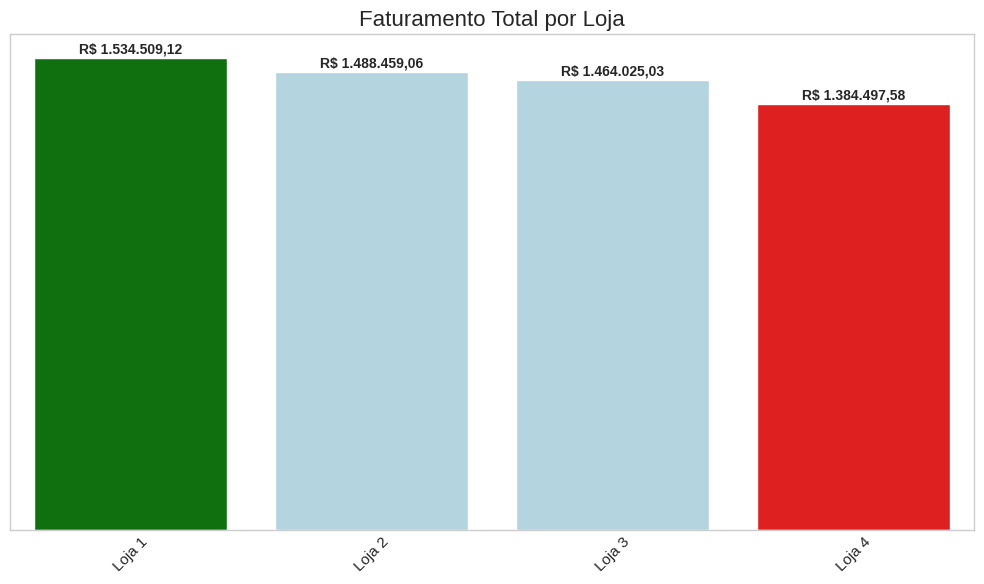

In [ ]:
# Calculando o faturamento total da loja
faturamento = dados_todas_lojas.groupby('loja')['Preço'].sum().reset_index()
faturamento = faturamento.sort_values('Preço', ascending=False)
faturamento.columns = ['Loja', 'Faturamento Total']

# Trazendo uma visualização em Gráfico de Barras do faturamento de cada Loja

faturamento_por_loja = dados_todas_lojas.groupby('loja')['Preço'].sum().reset_index()

max_loja = faturamento_por_loja['Preço'].idxmax()
min_loja = faturamento_por_loja['Preço'].idxmin()

# Trazendo cores diferente para diferenciar a loja que mais fatura da que menos fatura
cores = []
for i in range(len(faturamento_por_loja)):
    if i == max_loja:
        cores.append('green')
    elif i == min_loja:
        cores.append('red')
    else:
        cores.append('lightblue')

# Trazendo o gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=faturamento_por_loja, x='loja', y='Preço', hue='loja', palette=cores, dodge=False, legend=False)

# Títulos e eixos
plt.title('Faturamento Total por Loja', fontsize=16)

# Remove os rótulos dos eixos
plt.xlabel('')
plt.ylabel('')

# Adicionando linhas horizontais de grade no eixo Y para facilitar a leitura dos valores
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotacionando os rótulos do eixo X em 45 graus
plt.xticks(rotation=45)

# Remove os valores do eixo Y
plt.yticks([])

# Ajusta automaticamente os espaçamentos para evitar sobreposição de elementos
plt.tight_layout()

#Adicionando um Loop para aparecer os valores em cima de cada barra
for i, row in faturamento_por_loja.iterrows():
    plt.text(x=i,
             y=row['Preço'] + row['Preço'] * 0.01,  # um pouco acima da barra
             s=f"R$ {row['Preço']:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
             ha='center',
             fontsize=10,
             fontweight='bold')

plt.show()

# 2. Vendas por Categoria


In [ ]:
# Trazendo as categorias que cada loja vende
dados_todas_lojas['Categoria do Produto'].unique()

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

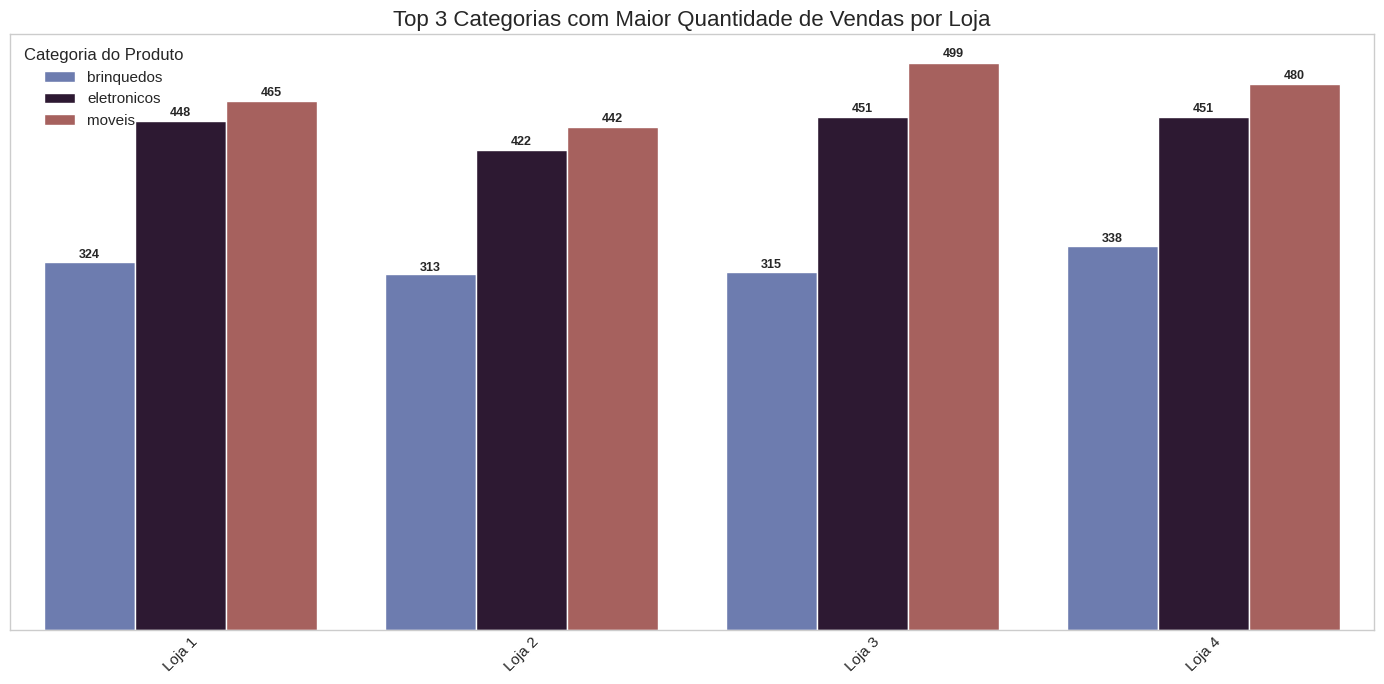

In [ ]:
# Analisando as Top 3 categorias que mais vendem em termos de quantidade por loja

# Agrupando os dados por loja e categoria do produto e somando os valores totais das vendas
vendas_categoria = dados_todas_lojas.groupby(['loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')
valor_categoria = dados_todas_lojas.groupby(['loja', 'Categoria do Produto'])['Preço'].sum().reset_index(name='Valor Total')

# Cominando os dois DataFraimes em apenas 1
categoria_analise = pd.merge(vendas_categoria, valor_categoria, on=['loja', 'Categoria do Produto'])

# Selecionando as 3 categorias mais vendidas por cada loja
categorias = vendas_categoria.sort_values('Quantidade', ascending=False).groupby('loja').head(3).sort_values(['loja', 'Quantidade'], ascending=True)

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criando o gráfico de barras
ax = sns.barplot(data=categorias, x='loja', y='Quantidade', hue='Categoria do Produto', palette='twilight', dodge=True)

# Títulos e eixos
plt.title('Top 3 Categorias com Maior Quantidade de Vendas por Loja', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()

# Loop para adicionar os valores em cima de cada barra
for p in ax.patches:
    valor = p.get_height()
    if valor > 0:
      x = p.get_x() + p.get_width() / 2
      y = valor + valor *0.01
      ax.text(x, y, f"{valor:.0f}",
              ha='center', fontsize=9, fontweight='bold')

plt.show()

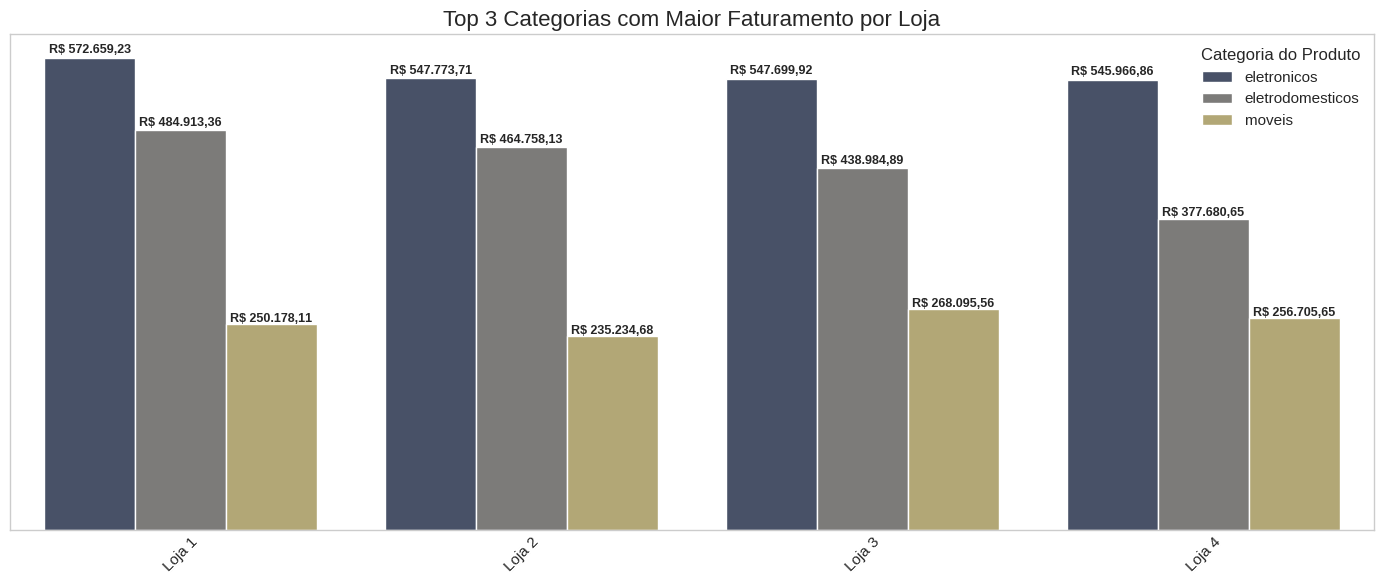

In [ ]:
# Analisando as Top 3 categorias com maior faturamento por loja

vendas_categoria = dados_todas_lojas.groupby(['loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')
valor_categoria = dados_todas_lojas.groupby(['loja', 'Categoria do Produto'])['Preço'].sum().reset_index(name='Valor Total')
categorias = valor_categoria.sort_values('Valor Total', ascending=False).groupby('loja').head(1).sort_values(['Valor Total'], ascending=False)

# Trazendo uma visualização em Gráfico de Barras Agrupadas para os Top 3 Categorias com maior faturamento por Loja

valor_categoria = dados_todas_lojas.groupby(['loja', 'Categoria do Produto'])['Preço'].sum().reset_index(name='Valor Total')

top3_categorias = valor_categoria.sort_values('Valor Total', ascending=False).groupby('loja').head(3)

# Trazendo o gráfico
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=top3_categorias, x='loja', y='Valor Total', hue='Categoria do Produto', palette='cividis')

plt.title('Top 3 Categorias com Maior Faturamento por Loja', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()

# Loop para adicionar os valores em cima de cada barra
for p in ax.patches:
    valor = p.get_height()
    if valor > 0:
      x = p.get_x() + p.get_width() / 2
      y = valor + valor *0.01
      ax.text(x, y, f"R$ {valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
              ha='center', fontsize=9, fontweight='bold')

plt.show()

# 2.1 Quantidade de Vendas Geral por Loja

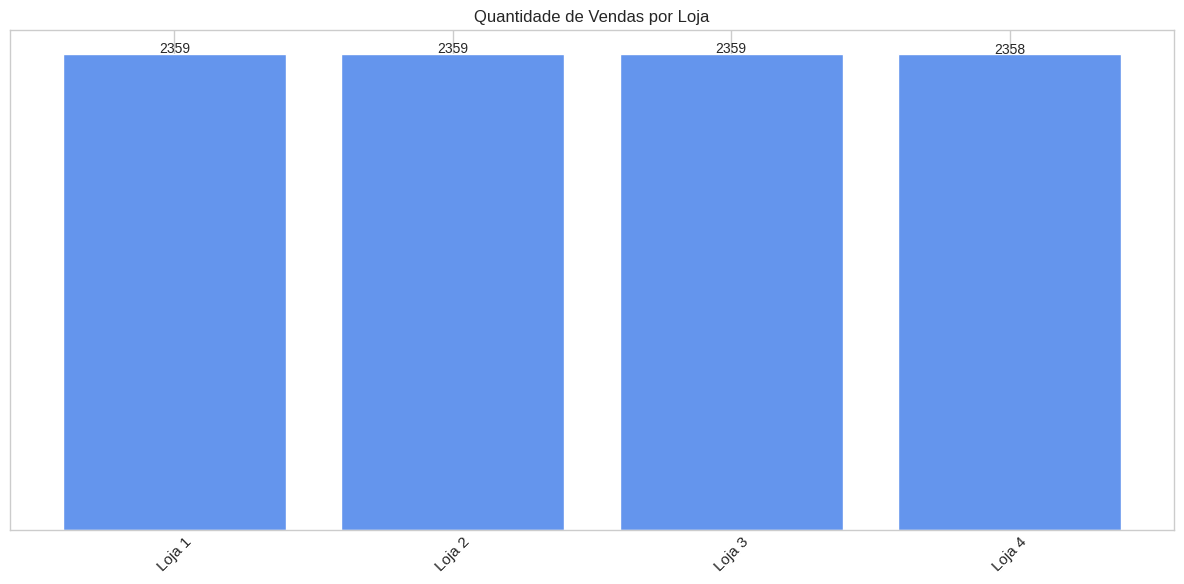

In [ ]:
# Contando a qtde de vendas geral por loja
vendas_por_loja = dados_todas_lojas.groupby('loja')['Produto'].count().reset_index()
vendas_por_loja.columns = ['Loja', 'Quantidade de Vendas']

plt.figure(figsize=(12, 6))

# Adicionando o gráfico de barras
plt.bar(vendas_por_loja['Loja'], vendas_por_loja['Quantidade de Vendas'], color='cornflowerblue')

# Adicionando os valores em cima das barras
for i, valor in enumerate(vendas_por_loja['Quantidade de Vendas']):
    plt.text(vendas_por_loja['Loja'][i], valor + 4,  # Ajuste do valor de deslocamento
             f'{valor}', ha='center', fontsize=10)

# Títulos e eixos
plt.title('Quantidade de Vendas por Loja')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()

plt.show()


# 3. Média de Avaliação das Lojas

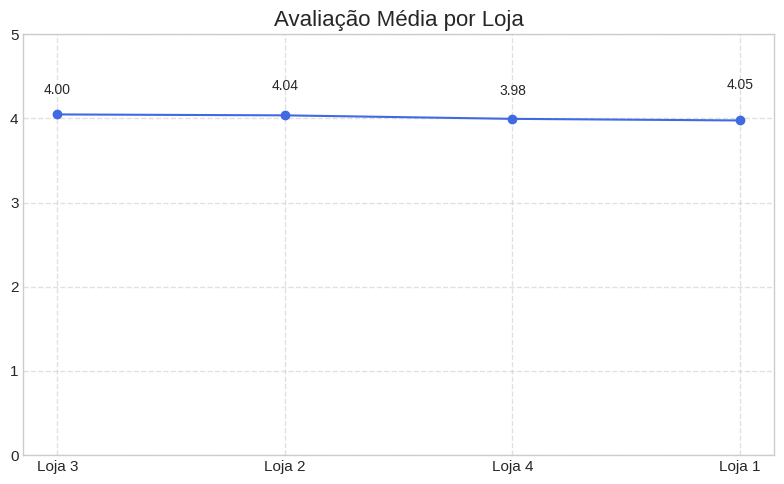

In [ ]:
# Calculando a média de avaliação por loja

avaliacao_media = dados_todas_lojas.groupby('loja')['Avaliação da compra'].mean().reset_index()
avaliacao_media = avaliacao_media.sort_values('Avaliação da compra', ascending=False)
avaliacao_media.columns = ['Loja', 'Avaliação Média']

plt.figure(figsize=(8, 5))

# Dados do gráfico
plt.plot(avaliacao_media['Loja'], avaliacao_media['Avaliação Média'], marker='o', linestyle='-', color='royalblue')

for i, valor in enumerate(avaliacao_media['Avaliação Média']):
    plt.text(avaliacao_media['Loja'][i], valor + 0.3, f'{valor:.2f}', ha='center', fontsize=10)


# Títulos e eixos
plt.title('Avaliação Média por Loja', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

# 4. Produtos Mais e Menos Vendidos

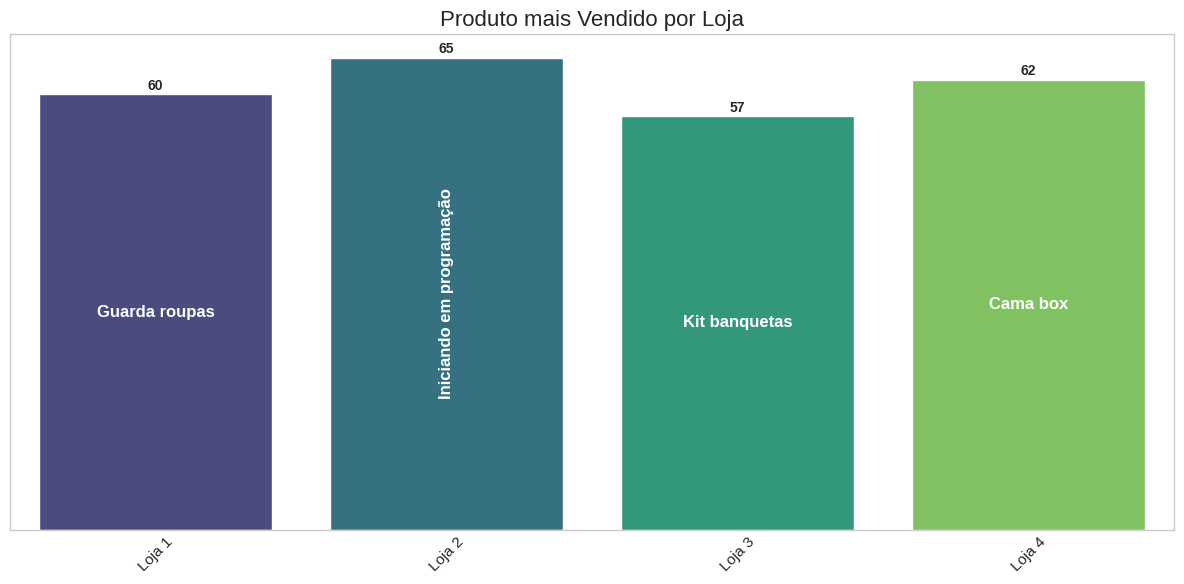

In [ ]:
# Produtos mais vendido por loja

# Calculando os produtos mais vendidos
produtos_mais_vendidos = dados_todas_lojas.groupby(['loja', 'Produto'])['Produto'].count().reset_index(name='Quantidade')
# Ordenando para encontrar os mais vendidos
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(['loja', 'Quantidade'], ascending=[True, False])
# Selecionando o produto mais vendido de cada loja
top_mais_vendidos = produtos_mais_vendidos.groupby('loja').head(1)

# Adicionando o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_mais_vendidos, x='loja', y='Quantidade', hue='Produto', palette='viridis')

# Removendo a legenda do gráfico
ax.legend_.remove()

# Títulos e eixos
plt.title('Produto mais Vendido por Loja', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
# Remove os valores do eixo Y
plt.yticks([])

# Adicionando rótulos dos nomes dos produtos nas barras
for i, row in enumerate(top_mais_vendidos.itertuples()):
  plt.text(i, row.Quantidade/2, row.Produto,
           ha='center', va='center',
           color='white', fontweight='bold',
           rotation=90 if len(row.Produto) > 15 else 0)

# Adicionando os valores em cima das barras
for p in ax.patches:
  valor = p.get_height()
  if valor > 0:
    x = p.get_x() + p.get_width() / 2
    y = valor + valor * 0.01
    ax.text(x, y, f"{valor:.0f}",
            ha='center', fontsize=10, fontweight='bold')

# Ajustando o espaçamento para não se sobrepor e exibindo o gráfico
plt.tight_layout()
plt.show()


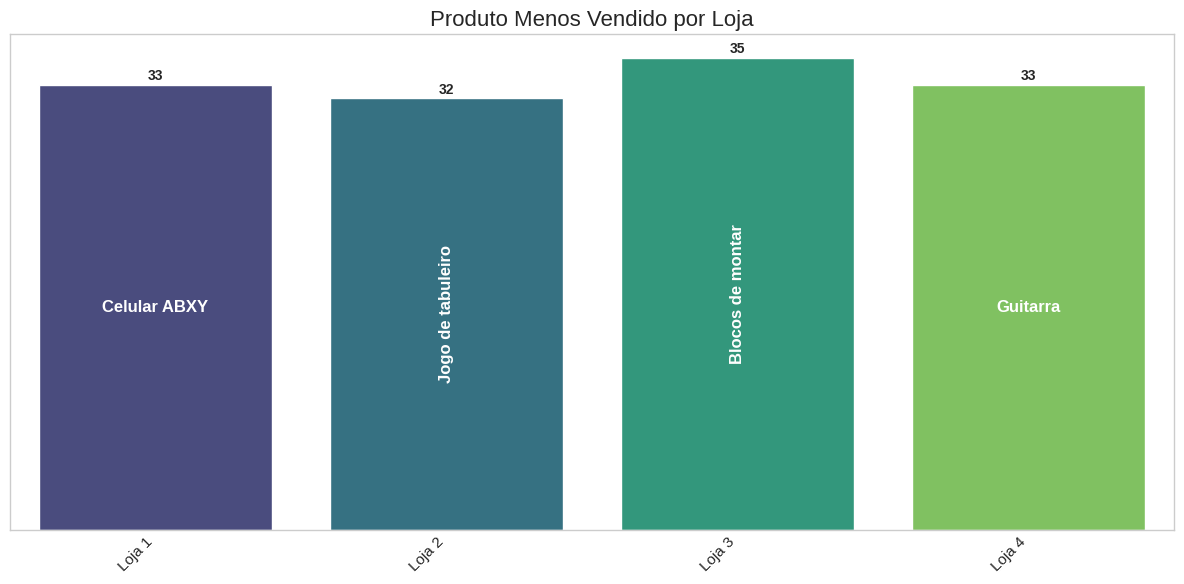

In [ ]:
# Produtos menos vendido por loja

# Agrupando produtos por loja e contando as quantidades
produtos_menos_vendidos = dados_todas_lojas.groupby(['loja', 'Produto'])['Produto'].count().reset_index(name='Quantidade')
# Ordenando para encontrar os menos vendidos
produtos_menos_vendidos = produtos_menos_vendidos.sort_values(['loja', 'Quantidade'], ascending=[True, True])
# Selecionando o produto menos vendido de cada loja
top_menos_vendidos = produtos_menos_vendidos.groupby('loja').head(1)

# Adicionando o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_menos_vendidos, x='loja', y='Quantidade', hue='Produto', palette='viridis')

# Removendo a legenda do gráfico
ax.legend_.remove()

# Títulos e eixos
plt.title('Produto Menos Vendido por Loja', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Remove os valores do eixo Y
plt.yticks([])

# Adicionando rótulos dos nomes dos produtos nas barras
for i, row in enumerate(top_menos_vendidos.itertuples()):
  plt.text(i, row.Quantidade/2, row.Produto,
           ha='center', va='center',
           color='white', fontweight='bold',
           rotation=90 if len(row.Produto) > 15 else 0)

# Adicionando os valores em cima das barras
for p in ax.patches:
  valor = p.get_height()
  if valor > 0:
    x = p.get_x() + p.get_width() / 2
    y = valor + valor * 0.01
    ax.text(x, y, f"{valor:.0f}",
            ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 4.1 Ticket Médio por Loja

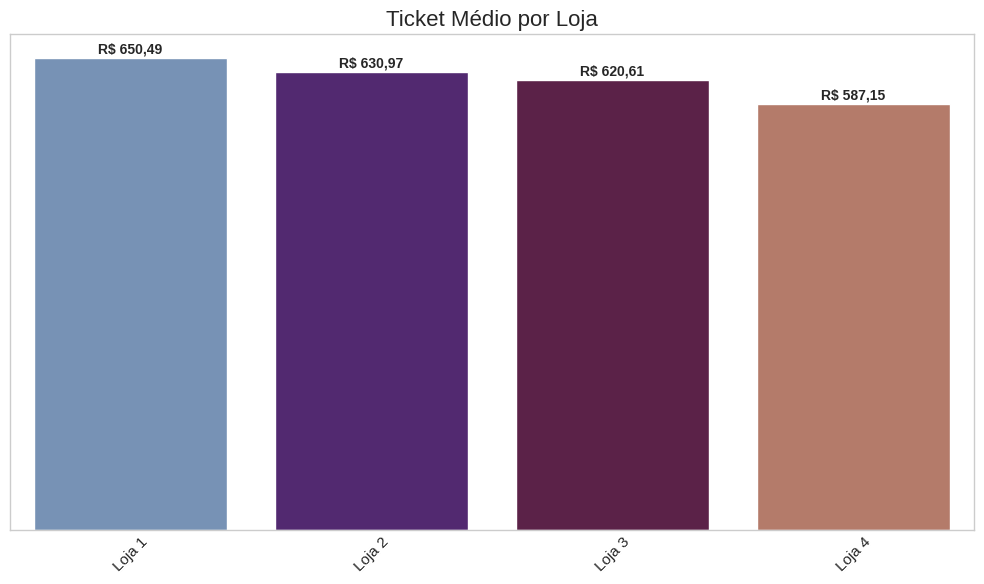

In [ ]:
# Agrupando o faturamento total por loja
faturamento_por_loja = dados_todas_lojas.groupby('loja')['Preço'].sum().reset_index(name='Faturamento Total')

# Contando quantas vendas cada loja fez
vendas_por_loja = dados_todas_lojas.groupby('loja').size().reset_index(name='Quantidade de Vendas')

# Juntando os dois dataframes
ticket_medio = pd.merge(faturamento_por_loja, vendas_por_loja, on='loja')

# Calculando o ticket médio
ticket_medio['Ticket Médio'] = ticket_medio['Faturamento Total'] / ticket_medio['Quantidade de Vendas']

# Trazendo o gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(data=ticket_medio, x='loja', y='Ticket Médio', hue='loja', palette='twilight')

plt.title('Ticket Médio por Loja', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.yticks([])


# Loop para adicionar os valores em cima de cada barra
for i, row in ticket_medio.iterrows():
    ax.text(i, row['Ticket Médio'] + row['Ticket Médio'] * 0.01,
             f"R$ {row['Ticket Médio']:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
             ha='center',
            fontsize=10,
            fontweight='bold')


plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


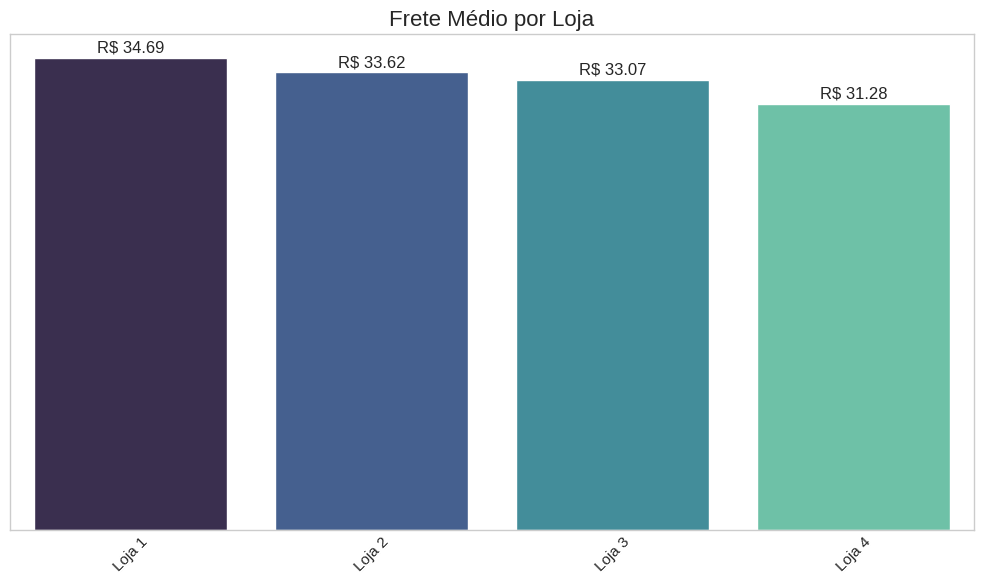

In [ ]:
# Agrupando a média de frete por loja
frete_medio = dados_todas_lojas.groupby('loja')['Frete'].mean().reset_index()
frete_medio = frete_medio.sort_values('Frete', ascending=False)
frete_medio.columns = ['Loja', 'Frete Médio']

# Trazendo o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=frete_medio, x='Loja', y='Frete Médio', hue='Loja', palette='mako')
plt.title('Frete Médio por Loja', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.yticks([])

# Loop para adicionar os valores em cima de cada barra
for i, v in enumerate(frete_medio['Frete Médio']):
    ax.text(i, v + 0.4, f'R$ {v:.2f}',
            ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 6. Vendas por Localização

In [ ]:
# Trazendo uma visualização de importancia de cada Estado nas vendas totais para cada loja

# Agrupando os dados por loja e estado para contar a quantidade de vendas
vendas_estado_loja = dados_todas_lojas.groupby(['loja', 'Local da compra'])['Preço'].sum().reset_index()
vendas_estado_loja.columns = ['Loja', 'Estado', 'Preço']

# Trazendo o gráfico Treemap
fig = px.treemap(
    vendas_estado_loja,
    path=['Loja', 'Estado'],
    values='Preço',
    color='Loja',
    title='Quantidade de Vendas por Estado e por Loja',
    color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

In [ ]:
# Trazendo uma visualização em Gráfico Interativo de vendas por Localização e Loja
vendas_localizacao = dados_todas_lojas.groupby(['loja', 'lat', 'lon']).size().reset_index(name='Quantidade')
valor_localizacao = dados_todas_lojas.groupby(['loja', 'lat', 'lon'])['Preço'].sum().reset_index(name='Valor Total')
lojas_localizacao_analise = pd.merge(vendas_localizacao, valor_localizacao, on=['loja', 'lat', 'lon'])
lojas_localizacao_analise = lojas_localizacao_analise.sort_values(['loja', 'Quantidade'], ascending=[True, False])

# Criando o mapa centralizado na média das coordenadas
m = folium.Map(location=[lojas_localizacao_analise['lat'].mean(),
                         lojas_localizacao_analise['lon'].mean()], zoom_start=5)

# Agrupador de marcadores
marker_cluster = MarkerCluster().add_to(m)

# Adicionando os pontos com popup para identificação
for _, row in lojas_localizacao_analise.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Loja: {row['loja']}<br>Quantidade: {row['Quantidade']}<br>Valor: R$ {row['Valor Total']:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."),
        icon=folium.Icon(color="blue", icon="shopping-cart", prefix="fa")
    ).add_to(marker_cluster)

# Mostrar o mapa
m

# Considerações Finais

Com base nos dados disponíveis, avaliei os principais indicadores de desempenho das **4 lojas da Alura Store** para identificar qual delas apresenta menor eficiência e seria a candidata ideal para ser vendida pelo Sr. João.

Os indicadores considerados foram:

| Indicador              | Loja 1          | Loja 2          | Loja 3          | Loja 4          |
|------------------------|-----------------|-----------------|-----------------|-----------------|
| Faturamento Total      | R\$ 1.534.509,12 | R\$ 1.488.459,06 | R\$ 1.464.025,03 | R$ 1.384.497,58 |
| Custo Médio com Frete  | R\$ 34,69        | R\$ 33,62        | R\$ 33,07        | R\$ 31,28        |
| Quantidade de Vendas   | 2.359           | 2.359           | 2.359           | 2.358           |
| Avaliação Média        | 4,05            | 4,04            | 4,00            | 3,98            |
| Ticket Médio           | R\$ 650,49       | R\$ 630,97       | R\$ 620,61       | R\$ 587,15       |

Ao aprofundar a análise, percebemos que a **Loja 4** apresenta o menor faturamento, com **R$ 1.384.497,58**, ficando significativamente abaixo das demais.

Em relação à quantidade de vendas, a Loja 4 teve apenas uma venda a menos que as outras, o que não é um fator determinante por si só. No entanto, sua **avaliação média de 3,98** é a pior entre todas, o que pode impactar negativamente na fidelização de clientes e no crescimento a longo prazo.

Apesar de apresentar o **menor custo médio de frete (R$ 31,28)**, esse ponto positivo não compensa seu desempenho inferior nos principais indicadores, como faturamento, ticket médio e avaliação dos clientes.

### Recomendação Final

Concluo que a **Loja 4** se destaca negativamente por apresentar:

- Menor faturamento
- Menor ticket médio
- Pior avaliação média dos clientes

Dessa forma, recomendo que o **Sr. João venda a Loja 4**, pois ela é a menos eficiente em termos de geração de receita, valor por venda e satisfação do cliente.

Essa decisão permitirá que ele concentre seus esforços nas lojas mais lucrativas (principalmente na Loja 1) e tenha maior capital disponível para investir em seu novo empreendimento.
